=== Word Frequency Analysis ===

Top 10 Most Common Words:
learning: 3
machine: 2
processing: 2
computer: 2
science: 2
data: 2
deep: 1
neural: 1
network: 1
natural: 1

=== Document-Term Matrix ===
   analytics  artificial  big  computer  data  deep  image  intelligence  \
0          0           0    0         0     0     1      0             0   
1          0           0    0         1     0     0      0             0   
2          1           0    1         0     2     0      0             0   
3          0           1    0         0     0     0      0             1   
4          0           0    0         1     0     0      1             0   

   language  learning  machine  natural  network  neural  processing  science  \
0         0         2        1        0        1       1           0        0   
1         1         0        0        1        0       0           1        1   
2         0         0        0        0        0       0           0        1   
3         0         1 

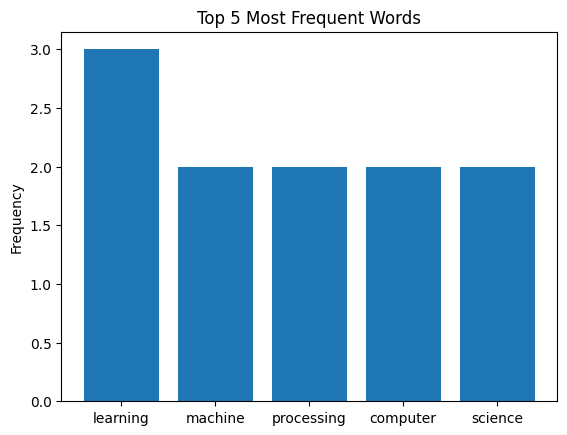


=== Bigram Analysis ===

Top 5 Bigrams:
artificial intelligence: 1
big data: 1
computer science: 1
computer vision: 1
data analytics: 1

=== Simple TF-IDF Calculation ===

TF-IDF Scores for Document 1:
machine: 0.0851
learning: 0.1703
deep: 0.1527
neural: 0.1527
network: 0.1527


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Sample preprocessed text data (already tokenized and cleaned)
documents = [
    "machine learning deep learning neural network",
    "natural language processing computer science",
    "data science big data analytics",
    "artificial intelligence machine learning",
    "computer vision image processing"
]

# 1. Basic Word Frequency Analysis
print("=== Word Frequency Analysis ===")
all_words = ' '.join(documents).split()
word_counts = Counter(all_words)

print("\nTop 10 Most Common Words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# 2. Document-Term Matrix
print("\n=== Document-Term Matrix ===")
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# Convert to pandas DataFrame for better visualization
import pandas as pd
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names_out())
print(dtm_df)

# 3. Simple Visualization
print("\n=== Visualization ===")
top_words = dict(word_counts.most_common(5))
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 5 Most Frequent Words")
plt.ylabel("Frequency")
plt.show()

# 4. Bigram Analysis
print("\n=== Bigram Analysis ===")
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = bigram_vectorizer.fit_transform(documents)

bigram_counts = Counter(bigram_vectorizer.get_feature_names_out())
print("\nTop 5 Bigrams:")
for bigram, count in bigram_counts.most_common(5):
    print(f"{bigram}: {count}")

# 5. Simple TF-IDF (without sklearn)
print("\n=== Simple TF-IDF Calculation ===")
import math

# Calculate TF (Term Frequency) for each document
def compute_tf(docs):
    tf_dict = {}
    for i, doc in enumerate(docs):
        words = doc.split()
        tf_dict[i] = {}
        total_words = len(words)
        for word in words:
            tf_dict[i][word] = tf_dict[i].get(word, 0) + (1/total_words)
    return tf_dict

# Calculate IDF (Inverse Document Frequency)
def compute_idf(docs):
    idf_dict = {}
    total_docs = len(docs)
    all_words = set(' '.join(docs).split())

    for word in all_words:
        count = sum(1 for doc in docs if word in doc)
        idf_dict[word] = math.log(total_docs / (1 + count))

    return idf_dict

# Compute TF-IDF
tf = compute_tf(documents)
idf = compute_idf(documents)

print("\nTF-IDF Scores for Document 1:")
for word, score in tf[0].items():
    tfidf = score * idf[word]
    print(f"{word}: {tfidf:.4f}")